# <center>Day-2 Practical Session, 26 May 2021</center>
## <center>Part 1: Incidence Weighting Estimator (IWE) under Bipartite Incidence Graph Sampling (BIGS)</center>
#### <center> *Li-Chun Zhang*<sup>1,2,3</sup> and *Melike Oguz-Alper*<sup>2</sup> </center>
  
##### <center> <sup>1</sup>*University of Southampton (L.Zhang@soton.ac.uk)*, <sup>2</sup>*Statistics Norway*, <sup>3</sup>*University of Oslo* </center>
***

### Illustration I: BIGS-IWE strategy: small data set

In this illustration, we will compare the efficiencies of several IWE estimators including the priority-rule estimators under BIG sampling. The first example is based on a small graph the node labels of which are the same as those in the graph described in Section 2.4.1 in Lecture Notes. Edges are created randomly by using the R-function <font color=green>**skthBIG**</font>.  

***
#### Description of the population and sampling strategies
* Population BIG: $\mathcal{B}=(F,\Omega;H)$, $H$ consists of edges between *sampling units* $i\in F$ and *study units* $\kappa\in\Omega$
* Sample BIG: $\mathcal{B}_s=(s_0,\Omega_s;H_s)$ with $s_0\in F$, $\Omega_s=\alpha(s_0)$, and $s_{ref}=s_0\times \Omega$ such that $H_s=H\cap s_{ref}=H\cap(s_0 \times \Omega)$
* $\beta_{\kappa}$: *ancestry* set of $\kappa \in \Omega$ and $\alpha_i$: *successors* of $i \in F$ 
* $s_0$ of size $n$ selected with SRSWOR from sampling frame $F$ of size $N$
*** 


#### Formula sheet
* The parameter of interest: size of $\Omega$: 

    $\theta=\sum_{\kappa\in\Omega}y_{\kappa}$, where $y_{\kappa}=1$ for all $\kappa\in \Omega$

* IWE based on  $\mathcal{B}_s=(s_0,\Omega_s;H_s)$ by BIGS

    $\hat{\theta} = \sum_{(i\kappa) \in H_s} W_{i\kappa} \frac{y_{\kappa}}{\pi_i}$

* Hansen-Hurwitz (HH) type estimators: special case of IWE, *constant* weights

    $\hat{\theta} =  \sum_{i\in s_0}\frac{z_i}{\pi_i}$, where $z_i=\sum_{\kappa \in\alpha_i}w_{i\kappa}y_{\kappa}$, with $\sum_{i\in \beta_{\kappa}} w_{i\kappa}=1$

    * HH-type estimator with *equal* weights: *multiplicity* estimator (Birnbaum and Sirken 1965)
    
        $w_{i\kappa}\equiv \frac{1}{\mid\beta_{\kappa}\mid}$
    
    * HH-type estimator with *unequal* weights: *probability and inverse degree-adjusted (PIDA) weights*
     
        $w_{i\kappa}\propto \frac{\pi_i}{\mid\alpha_i\mid^{\gamma}}$, $\gamma > 0$
        
**NB**. Under SRS of $s_0$ and when $\gamma=0$, the HH-type estimator with PIDA weights become equivalent to the multiplicity estimator above
    
* HTE: a special case of IWE

    $\hat{\theta}_{HT}=\sum_{\kappa\in \Omega_s} \frac{y_{\kappa}}{\pi_{(\kappa)}}$


The first-order inclusion probabilies $\pi_{(\kappa)}=\mathrm{Pr}(\kappa\in\Omega_s)$ can be calculated, under SRS of $s_0$, by

$\pi_{(\kappa)}=1-\bar{\pi}_{\beta_{\kappa}}=1-\binom{N-\mid\beta_{\kappa}\mid}{n}/\binom{N}{n}$, where $\mid\beta_{\kappa}\mid$ is the size of the ancestor set of $\kappa$
    
* Priority-rule estimators with *priority rule* to the sample edges $H_s$: $I_{i\kappa} = 1$ if $i = \min(s_0 \cap \beta_{\kappa})$, and $I_{i\kappa} = 0$ otherwise

    $\hat{\theta}_p = \sum_{(i\kappa)\in H_s} \Big( \frac{I_{i\kappa} \omega_{i\kappa}}{p_{(i\kappa)}} \Big) \frac{y_{\kappa}}{\pi_i}$, where $p_{(i\kappa)} = \mbox{Pr}(I_{i\kappa} =1 | \kappa \in \Omega_s)$
    
The probabilities $p_{(i\kappa)}$ can be calculated, under SRS of $s_0$, by 

$p_{(i\kappa)}=\binom{N-1-d_{i(\kappa)}}{n-1}/\binom{N-1}{n-1}$, where $d_{i(\kappa)}$ the number of nodes with higher probability than $i$ for each $\kappa \in \Omega$ and $i\in \beta_{\kappa}$ for the priority-rule $\min(s_0 \cap \beta_{\kappa})$


***

**NB**. R-package **igraph** has to be installed before running R-functions below that generates random graphs.

***

#### Description of R-function <font color=green>**skthBIG**</font>
##### 1. Function parameters
* **showplot**: Use <font color=blue>**TRUE**</font> to get BIG illustration. Default value: <font color=blue>**FALSE**</font>

##### 2. Main steps of the function
* A random bipartite graph generated with $F=\{1,2,3,4\}$ and $\Omega=\{5,6,7,8,9,10,11\}$
* Out and in-degrees initiliased based on $\mid\alpha_i\mid$ and $\mid\beta_{\kappa}\mid$, for $i\in F$ and $\kappa \in \Omega$, in the example presented in Section 2.4.1. However, final values may differ from these initial value due to random generation of edges. The total number of degrees may differ as well, since multiple edges and loops are removed if they exist in the initial random graph generated 

##### 3. Main outputs of the function
* BIG plot shown if **showplot**=  <font color=blue>**TRUE**</font>
* A list of random graph generated: Use **$G** to get the graph


#### Description of R-function <font color=green>**zFun**</font>
##### 1. Function parameters
* **popgraph**: population graph to be used: outputs of <font color=green>**skthBIG**</font>
* **coefgamma**: coefficient to be used in the HH-type estimator with PIDA weights; default value $0$. No effect of the choice if **multiplicity**= <font color=blue>**TRUE**</font>
* **n**: sample size of initial sample $s_0$; default value $2$
* **multiplicity**: Use <font color=blue>**TRUE**</font> to get $z_i$ values based on equal weights, i.e. $w_{i\kappa}=\mid\beta_{\kappa}\mid^{-1}$; default <font color=blue>**FALSE**</font>

##### 2. Main steps of the function
* Edge set derived from the population graph, as well as the labels of the vertices in $F$ and $\Omega$
* $\mid \alpha_i \mid$ and $\mid \beta_{\kappa}\mid$ calculated based on the edge set
* $z_i$ values calculated for all $i\in F$ for chosen values of $\gamma$

##### 3. Main outputs of the function
* $z_i$ values returned


#### Description of R-function <font color=green>**mainBIGSIWE**</font>
##### 1. Function parameters
* **popgraph**: population graph to be used: use the output of the function <font color=green>**skthBIG**</font>
* **coefgamma**: coefficient to be used in the HH-type estimator with PIDA weights; default value $0$
* **n**: sample size of initial sample $s_0$; default value $2$


##### 2. Main steps of the function
* Edge set derived from the population graph, as well as the labels of the vertices in $F$ and $\Omega$
* $\mid \alpha_i \mid$ and $\mid \beta_{\kappa}\mid$ calculated based on the edge set
* Inclusion probabilities $\pi_{(\kappa)}$ calculated based on $\mid \beta_{\kappa}\mid$
* All possible samples of size $n$ selected with SRS from $F$
* For each random sample, estimates obtained from the HTE, the HH-type estimator and the priority-rule estimator. For the last one, three orders of out-degrees $\alpha_i$, considered: *random*, *ascending* and *descending*

##### 3. Main outputs of the function
* Expected values and the sampling variances of the estimators calculated based on the sample estimates over all possible samples

***

In [57]:
# Load package -igraph-
library(igraph)

In [58]:
# Examples similar to those in Chapter 2.4
##
# Same vertices as the graph in Chapter 2.4.1 in Lecture Notes
# Edges created randomly may differ from those in L.Notes
skthBIG <- function(showplot=FALSE){
tmp.card_alphai <- c(3,4,1,5)
tmp.card_betak <- c(1,2,3,3,2,1,1)

    
# Generate random bipartite graph.
# g <- sample_bipartite(6, 9, type="Gnm",m=15,directed=TRUE) # this may generate a graph with isolated nodes
g <- sample_degseq(out.deg=c(tmp.card_alphai,rep(0,length(tmp.card_betak))), in.deg = c(rep(0,length(tmp.card_alphai)),tmp.card_betak))


# Simplify graph by removing loops and multiple edges
g <- simplify(g, remove.multiple = TRUE, remove.loops = TRUE,
              edge.attr.comb = igraph_opt("edge.attr.comb"))

# Apply bipartite layout
LO_bipart <- layout_as_bipartite(g,types=bipartite_mapping(g)$type)
LO_bipart[bipartite_mapping(g)$type==FALSE,2] <- 0
LO_bipart[bipartite_mapping(g)$type==TRUE,2] <- 1



nodecolor <- rep("yellow",length(V(g)))
nodecolor[bipartite_mapping(g)$type==TRUE] <- "orange"

# Plot BIG
if(showplot){
plot(g, vertex.label=V(g), vertex.size=10,vertex.label.dist=0,vertex.label.cex=1.25,
     vertex.color=nodecolor, layout=LO_bipart[,2:1])
}
return(list(G=g))
}

In [59]:
# zi-values
zFun <- function(popgraph,coefgamma=0,n=2,multiplicity=FALSE){
  edgeik <- data.frame(as_edgelist(popgraph))
  colnames(edgeik) <- c('i','k')
  idx_F <- unique(edgeik$i)
  idx_omega <- unique(edgeik$k)
  card_alphai <- NULL
  for(i in idx_F){
    card_alphai <- c(card_alphai,sum(edgeik$i %in% i))  
  }
  
  card_betak <- NULL
  for(k in idx_omega){
    card_betak <- c(card_betak,sum(edgeik$k %in% k))  
  }
  yk <- rep(1,length(idx_omega))
  probi <- rep(n/length(idx_F),length(idx_F))
  zi <-  NULL
  for(i in idx_F){
    if(i %in% edgeik$i){
      tmp.k <- edgeik$k[edgeik$i %in% i]
      if(multiplicity){tmp.zi <- sum(yk[idx_omega %in% tmp.k]/card_betak[idx_omega %in% tmp.k])}
      if(!multiplicity){
        tmp.zi <- 0
        for(k in tmp.k){
          betak <- edgeik$i[edgeik$k %in% k]
          wik <- (probi[idx_F==i]*(1/(card_alphai[unique(edgeik$i)==i])^coefgamma)/(sum(probi[idx_F %in% betak]*(1/card_alphai[unique(edgeik$i) %in% betak])^coefgamma)))
          tmp.zi <- tmp.zi + yk[idx_omega==k]*wik
        }
      }
    }
    if(!(i %in% edgeik$i)){
      tmp.zi <- 0}
    zi <- c(zi,tmp.zi)
  }
  return(zi)
}

In [60]:
# HTE, HH-type estimators and priority-rule estimators
mainBIGSIWE <- function(popgraph,coefgamma=0,n=2){
  edgeik <- data.frame(as_edgelist(popgraph))
  colnames(edgeik) <- c('i','k')
  idx_F <- unique(edgeik$i)
  N <- length(idx_F)
  idx_omega <- unique(edgeik$k)
  card_alphai <- NULL
  for(i in idx_F){
    card_alphai <- c(card_alphai,sum(edgeik$i %in% i))  
  }
  
  card_betak <- NULL
  for(k in idx_omega){
    card_betak <- c(card_betak,sum(edgeik$k %in% k))  
  }
  
  yk <- rep(1,length(idx_omega))
  probi <- rep(n/N,N)
  probk <- 1-choose(N-card_betak,n)/choose(N,n)
  
  
  # All possible subsets
  all.subsets <- combn(N,n)
  B <- dim(all.subsets)[2]

  # Estimates over random samples
  YhatHH_alpha <- NULL
  YhatHT <- NULL
  Yhatp <- matrix(0,nrow=B,ncol=3)
  idx_F_rnd <- idx_F[order(runif(N,0,1))]
  for(b in 1:B){
    s0 <- idx_F[all.subsets[,b]]
    s1 <- unique(edgeik$k[edgeik$i %in% s0])
    zi_alpha <- zFun(popgraph,coefgamma)
    probi <- rep(n/N,N)
    YhatHH_alpha <- c(YhatHH_alpha,sum(zi_alpha[idx_F %in% s0]/probi[idx_F %in% s0])) 
    YhatHT <- c(YhatHT,sum(yk[idx_omega %in% s1]/probk[idx_omega %in% s1])) 
    # For priority-rule estimators 
    col.id <- 1
    for(orderF in c('random','ascending','descending')){
      idx_F_ordered <- idx_F_rnd
      if(orderF=="ascending"){idx_F_ordered <- idx_F[order(card_alphai)]}
      if(orderF=="descending"){idx_F_ordered <- rev(idx_F[order(card_alphai)])}
    tmp.Yhatp <- 0
    for(k in s1){
      betak <- edgeik$i[edgeik$k %in% k]
      prioriloc <- min(which(idx_F_ordered %in% betak[betak %in% s0]))
      priori <- idx_F_ordered[prioriloc]
      dik <- sum(which(idx_F_ordered %in% betak)<prioriloc)
      pik <- choose(N-1-dik,n-1)/choose(N-1,n-1)
      tmp.Yhatp <- tmp.Yhatp + yk[idx_omega %in% k]/pik/card_betak[idx_omega %in% k]/probi[idx_F %in% priori]
    }
    Yhatp[b,col.id] <- tmp.Yhatp
    col.id <- col.id + 1
    }
  }
  
  cat("gamma =",coefgamma,"\n")
  cat("idxF: ",idx_F, '\t',"alphai: ", card_alphai,"\n")

  resultIWE <- t(array(c(mean(YhatHT),mean(YhatHH_alpha),mean(Yhatp[,1]),mean(Yhatp[,2]),mean(Yhatp[,3]),c(var(YhatHT),var(YhatHH_alpha),var(Yhatp[,1]),var(Yhatp[,2]),var(Yhatp[,3]))*(B-1)/B),c(5,2)))
  colnames(resultIWE) <- c('YhatHTE','ZhatHH','Yhatp_rnd','Yhatp_asc','Yhatp_desc')
  rownames(resultIWE) <- c('ExpectedValue','Variance')
  print(resultIWE)
}

+ 11/11 vertices, from 954d6f9:
 [1]  1  2  3  4  5  6  7  8  9 10 11

+ 11/11 edges from 954d6f9:
 [1] 1-> 8 1->10 1->11 2-> 5 2-> 6 2-> 7 2-> 8 3-> 8 4-> 6 4-> 7 4-> 9

1,8
1,10
1,11
2,5
2,6
2,7
2,8
3,8
4,6
4,7
4,9


|Beta_kappa| = 1 2 2 3 1 1 1 
|alpha_i| = 3 4 1 3 


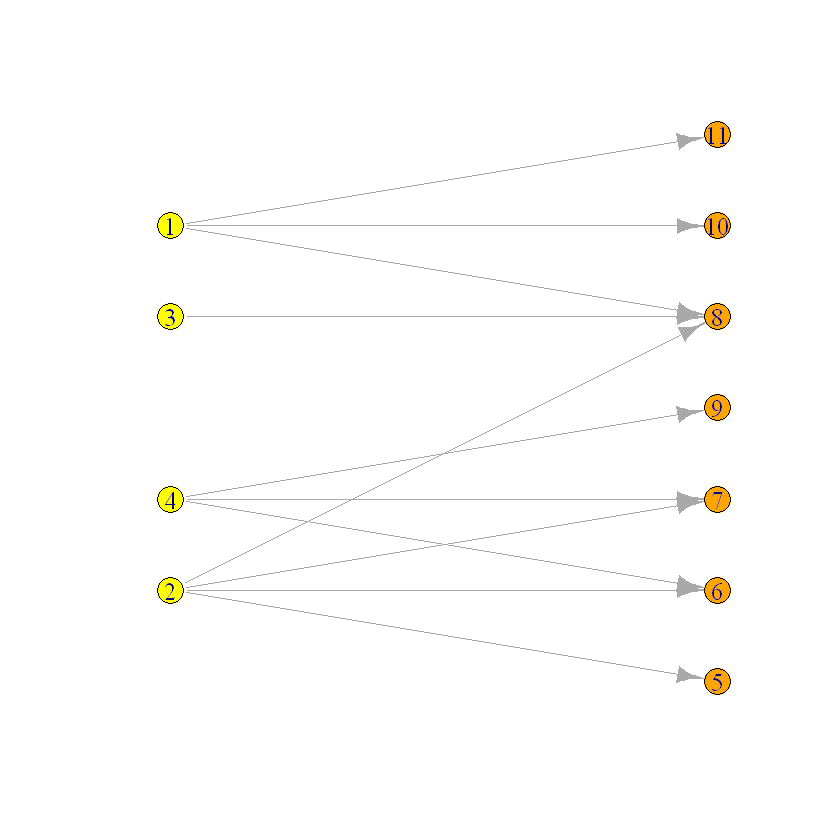

In [61]:
# Generate a population graph
set.seed(270521)
popg <- skthBIG(showplot=TRUE)$G
V(popg)
E(popg)
as_edgelist(popg)
cat('|Beta_kappa| =',table(as_edgelist(popg)[,2]),'\n')
cat('|alpha_i| =', table(as_edgelist(popg)[,1]),'\n')

In [63]:
# zFun(popgraph,coefgamma=0,n=2,multiplicity=FALSE)
coefg <- 1
cat('g:',coefg,'\t','zi_alpha:',zFun(popg,coefg),'; var(zi_alpha):',var(zFun(popg,coefg)),"\n",'\t','zi_beta:',zFun(popg,multiplicity = TRUE),'; var(zi_beta):',var(zFun(popg,multiplicity = TRUE)),"\n")

g: 1 	 zi_alpha: 2.210526 2.015038 0.6315789 2.142857 ; var(zi_alpha): 0.5625106 
 	 zi_beta: 2.333333 2.333333 0.3333333 2 ; var(zi_beta): 0.9166667 


[1] 2.6


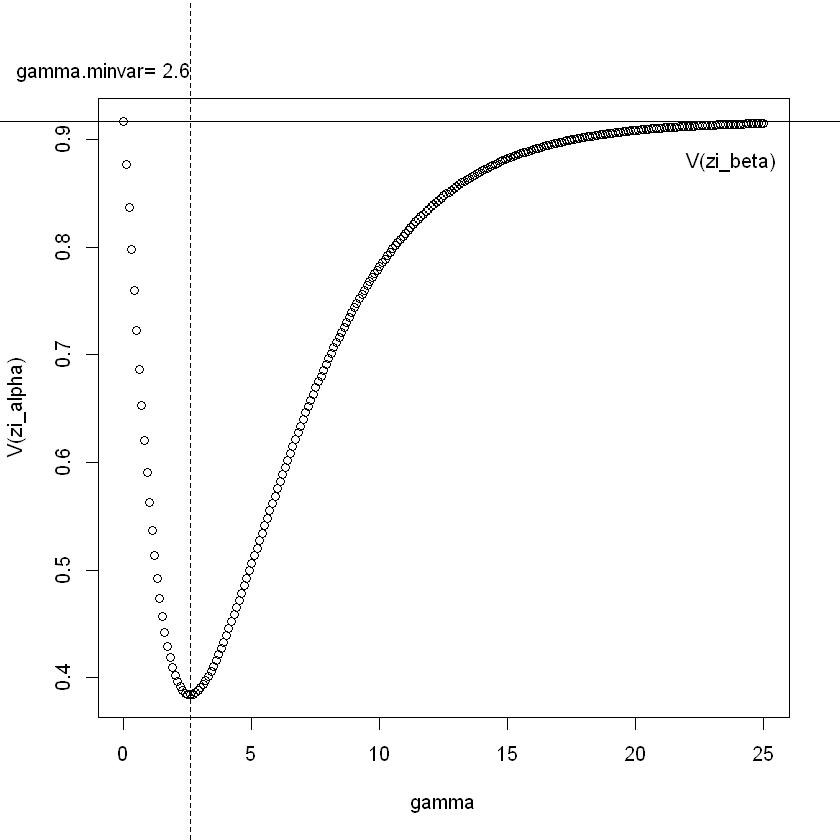

In [64]:
# Variance of zi_alpha for different choices of gamma
max.gamma <- 25
range.gamma <- seq(0,max.gamma,by=0.1)
varzi_alpha <- NULL
for(tmp.gamma in range.gamma){tmp <- var(zFun(popg,tmp.gamma))
varzi_alpha <- c(varzi_alpha,tmp)}
# Gamma value which gives minimum variance
gamma.minvar <- range.gamma[which(varzi_alpha==min(varzi_alpha))]
print(gamma.minvar)
par(mfrow=c(1,1),xpd=TRUE)
plot(range.gamma,varzi_alpha,xlab='gamma',ylab='V(zi_alpha)')
abline(h=var(zFun(popg,0,multiplicity=TRUE)))
text(max.gamma*0.95,var(zFun(popg,0,multiplicity=TRUE))*0.98,label='V(zi_beta)',pos=1)
abline(v=gamma.minvar,lty=2)
text(gamma.minvar,max(varzi_alpha)*1.05,label=paste('gamma.minvar=',gamma.minvar),adj=1)

In [65]:
# Minimum variance
var(zFun(popg,gamma.minvar))
# Variance with multiplicity weights
var(zFun(popg,0))

[1] 0.3844381

[1] 0.9166667

In [68]:
mainBIGSIWE(popg)

gamma = 0 
idxF:  1 2 3 4 	 alphai:  3 4 1 3 
               YhatHTE   ZhatHH Yhatp_rnd Yhatp_asc Yhatp_desc
ExpectedValue 7.000000 7.000000  7.000000  7.000000   7.000000
Variance      3.466667 3.666667  4.888889  4.444444   3.555556


In [69]:
mainBIGSIWE(popg,coefgamma=gamma.minvar)

gamma = 2.6 
idxF:  1 2 3 4 	 alphai:  3 4 1 3 
               YhatHTE   ZhatHH Yhatp_rnd Yhatp_asc Yhatp_desc
ExpectedValue 7.000000 7.000000  7.000000  7.000000   7.000000
Variance      3.466667 1.537753  3.555556  4.444444   3.555556


In [70]:
mainBIGSIWE(popg,coefgamma=0.5)

gamma = 0.5 
idxF:  1 2 3 4 	 alphai:  3 4 1 3 
               YhatHTE   ZhatHH Yhatp_rnd Yhatp_asc Yhatp_desc
ExpectedValue 7.000000 7.000000  7.000000  7.000000   7.000000
Variance      3.466667 2.889496  5.111111  4.444444   3.555556
